#### About Company
* Dream Housing Finance company deals in all home loans. 
* They have presence across all urban, semi urban and rural areas. 
* Customer first apply for home loan after that company validates the customer eligibility for loan.

#### Problem
* Company wants to automate the loan eligibility process (real time) 
* based on customer detail provided while filling online application form. 
* These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.
* To automate this process, they have given a problem to identify the customers segments, 
* those are eligible for loan amount so that they can specifically target these customers. 
* Here they have provided a partial data set.

#### Data
* Variable              
        * Description

- Loan_ID              
    
    * Unique Loan ID

- Gender                
    * Male/ Female

- Married               
    * Applicant married (Y/N)

- Dependents             
    * Number of dependents

- Education             
    * Applicant Education (Graduate/ Under Graduate)

- Self_Employed        
    *  Self employed (Y/N)

- ApplicantIncome      
    * Applicant income

- CoapplicantIncome     
    * Coapplicant income

- LoanAmount            
    * Loan amount in thousands

- Loan_Amount_Term      
    * Term of loan in months

- Credit_History       
    * credit history meets guidelines

- Property_Area         
    * Urban/ Semi Urban/ Rural

- Loan_Status          
    * Loan approved (Y/N)

 

#### Note: 

* Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.
* You are expected to upload the solution in the format of "sample_submission.csv"

In [1]:
cd C:\Users\Administrator\Desktop\data hack finance

C:\Users\Administrator\Desktop\data hack finance


In [2]:
import pandas as pd

In [3]:
test = pd.read_csv("test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

* Replacing the NUll values 

In [5]:
test['Dependents']=test['Dependents'].fillna(0)

test['Credit_History']=test['Credit_History'].fillna(0.0).astype(int)

b=test['Gender'].mode()
test['Gender']=test['Gender'].fillna(b.values[0])   ### gender column in series so it cant replace it directly, take a.values of that column and applies mode

c=test['Self_Employed'].mode()
test['Self_Employed']=test['Self_Employed'].fillna(c.values[0])

d=test['LoanAmount'].mean()
test['LoanAmount']=test['LoanAmount'].fillna(d)

e=test['Loan_Amount_Term'].mean()
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(e)

f=test['Gender'].mode()
test['Gender']=test['Gender'].fillna(f.values[0])

#train.head()

g=test['Married'].mode()
test['Married']=test['Married'].fillna(g.values[0])

* removing the Loan_ID columns

In [6]:
test_new=test.drop(['Loan_ID'],axis=True)
test_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban


* Seprating the Data using( Float and int ) for numerical data and categorical data using (object and O )

In [7]:
dict(test_new.dtypes)

{'Gender': dtype('O'),
 'Married': dtype('O'),
 'Dependents': dtype('O'),
 'Education': dtype('O'),
 'Self_Employed': dtype('O'),
 'ApplicantIncome': dtype('int64'),
 'CoapplicantIncome': dtype('int64'),
 'LoanAmount': dtype('float64'),
 'Loan_Amount_Term': dtype('float64'),
 'Credit_History': dtype('int32'),
 'Property_Area': dtype('O')}

In [8]:
test1 = [key for key in dict(test_new.dtypes) if dict(test_new.dtypes)[key] in ['Float64','int64','float32','int32']]
test2 = [key for key in dict(test_new.dtypes) if dict(test_new.dtypes)[key] in ['object','O']]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


In [9]:
test_num = test_new[test1]
test_cat = test[test2]

* deacting the outlier 

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

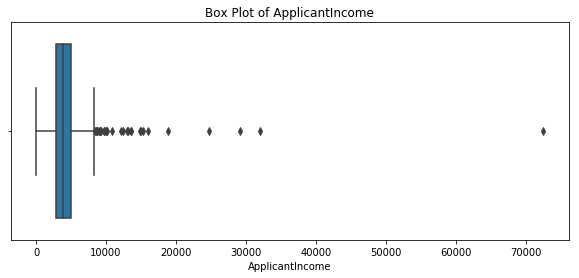

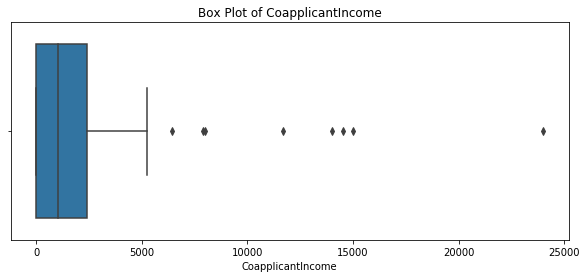

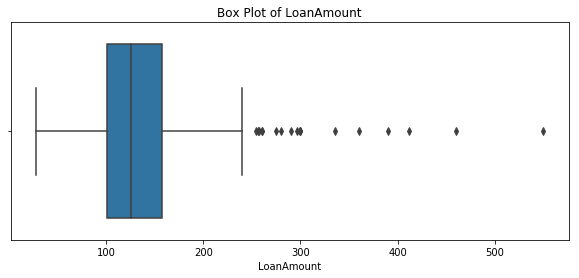

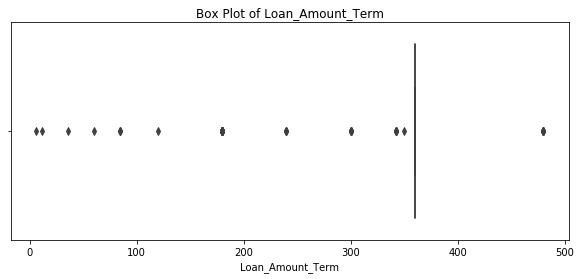

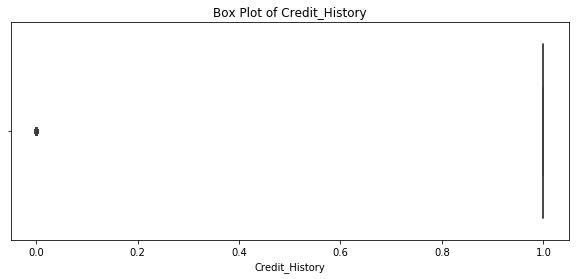

In [15]:
for num_variable in test_num:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( x=num_variable, data = test_num)
    plt.title(str('Box Plot of ') + str(num_variable))

* Using Caping method for outlier

In [16]:
def outlier_capping(x):
    ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(ul)
    x = x.clip_lower(ll)
    return x

test_num_new=test_num.apply(lambda x: outlier_capping(x))
test_num_new.describe()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  after removing the cwd from sys.path.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  """


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.0,367.0
mean,4238.964578,1425.501362,132.109436,360.0,1.0
std,1950.976357,1600.086250,46.921430,0.0,0.0
min,0.000000,0.000000,28.000000,360.0,1.0
25%,2864.000000,0.000000,101.000000,360.0,1.0
50%,3786.000000,1025.000000,126.000000,360.0,1.0
75%,5060.000000,2430.500000,157.500000,360.0,1.0
max,8354.000000,6076.250000,242.250000,360.0,1.0


* check the columns whether columns has outlier or not

ApplicantIncome    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

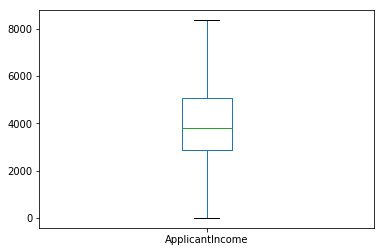

In [17]:
test_num_new['ApplicantIncome'].plot(subplots=True , kind = 'box')

* Appling get_dummies on categorical columns 

In [18]:
test_cat_new= pd.get_dummies(test_cat,drop_first=True)

In [69]:
new_test = pd.concat([test_num_new,test_cat_new ], axis = 1)
new_test.shape

(367, 15)

## Train data Set

In [71]:
train = pd.read_csv("train_ctrUa4K.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [22]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## checking the corelation 

In [24]:
import seaborn as sns

In [25]:
#sns.pairplot(data=train)

In [26]:
# import matplotlib.pyplot as plt
# corr = train.corr(method="kendall")
# plt.figure(figsize=(10,8))
# sns.heatmap(corr,annot = True)
# train.columns

In [27]:
train['Dependents']=train['Dependents'].fillna(0)

train['Credit_History']=train['Credit_History'].fillna(0.0).astype(int)

### gender column in series so it cant replace it directly, take a.values of that column and applies mode

a=train['Gender'].mode()
train['Gender']=train['Gender'].fillna(a.values[0])   
Self_Employed_mode=train['Self_Employed'].mode()
train['Self_Employed']=train['Self_Employed'].fillna(Self_Employed_mode.values[0])

LoanAmount_mean=train['LoanAmount'].mean()
train['LoanAmount']=train['LoanAmount'].fillna(LoanAmount_mean)

lt_loan_mean=train['Loan_Amount_Term'].mean()
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(lt_loan_mean)

gernder_mode=train['Gender'].mode()
train['Gender']=train['Gender'].fillna(gernder_mode.values[0])

#train.head()

Married_mode=train['Married'].mode()
train['Married']=train['Married'].fillna(Married_mode.values[0])

#Married_mode

In [28]:
train['Dependents']=train['Dependents'].fillna(0)

In [29]:
train['Credit_History']=train['Credit_History'].fillna(0.0).astype(int)

In [30]:
a=train['Gender'].mode()
train['Gender']=train['Gender'].fillna(a.values[0])   
### gender column in series so it cant replace it directly, take a.values of that column and applies mode

In [31]:
Self_Employed_mode=train['Self_Employed'].mode()
train['Self_Employed']=train['Self_Employed'].fillna(Self_Employed_mode.values[0])

In [32]:
LoanAmount_mean=train['LoanAmount'].mean()
train['LoanAmount']=train['LoanAmount'].fillna(LoanAmount_mean)

In [33]:
lt_loan_mean=train['Loan_Amount_Term'].mean()
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(lt_loan_mean)

In [34]:
gernder_mode=train['Gender'].mode()
train['Gender']=train['Gender'].fillna(gernder_mode.values[0])

In [35]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y


In [36]:
test['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [37]:
#Checking how the data looks like
# train.ApplicantIncome.hist()

In [40]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(test['ApplicantIncome'], train['LoanAmount'])
# ax.set_xlabel('ApplicantIncome')
# ax.set_ylabel('LoanAmount')
# plt.show()

In [41]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y


In [42]:
dict(train.dtypes)

{'Loan_ID': dtype('O'),
 'Gender': dtype('O'),
 'Married': dtype('O'),
 'Dependents': dtype('O'),
 'Education': dtype('O'),
 'Self_Employed': dtype('O'),
 'ApplicantIncome': dtype('int64'),
 'CoapplicantIncome': dtype('float64'),
 'LoanAmount': dtype('float64'),
 'Loan_Amount_Term': dtype('float64'),
 'Credit_History': dtype('int32'),
 'Property_Area': dtype('O'),
 'Loan_Status': dtype('O')}

In [43]:
train1 = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64','int64','float32','int32']] 
train2 = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object','O']]

In [44]:
train_num = train[train1]
train_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1
1,4583,1508.0,128.000000,360.0,1
2,3000,0.0,66.000000,360.0,1
3,2583,2358.0,120.000000,360.0,1
4,6000,0.0,141.000000,360.0,1


In [45]:
train_cat = train[train2]
train_cat['Dependents']=train_cat['Dependents'].apply( lambda x  : x.replace('+','') if x == '3+' else x)
train_cat.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


* let have a look that how many class in each columns has

In [46]:
for col in train_cat.columns:
    print(col,': ',len(train_cat[col].unique()),'labels')

Loan_ID :  614 labels
Gender :  2 labels
Married :  2 labels
Dependents :  5 labels
Education :  2 labels
Self_Employed :  2 labels
Property_Area :  3 labels
Loan_Status :  2 labels


In [47]:
train_cat=train_cat.drop(['Loan_ID'],axis=1)
train_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [48]:
train_new_cat =pd.get_dummies(train_cat,drop_first=True)
train_new_cat.head()

,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,1,0,0,0,0,0,0,1,1
1,1,1,0,1,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,1,0,1,1
3,1,1,1,0,0,0,1,0,0,1,1
4,1,0,1,0,0,0,0,0,0,1,1


In [49]:
train_num=train_num.round()
train_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.0,360.0,1
1,4583,1508.0,128.0,360.0,1
2,3000,0.0,66.0,360.0,1
3,2583,2358.0,120.0,360.0,1
4,6000,0.0,141.0,360.0,1


* finding the skewness along with the index

In [50]:
train_num.skew(axis=0)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.727127
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
dtype: float64

* finding the skewness along with the Rows

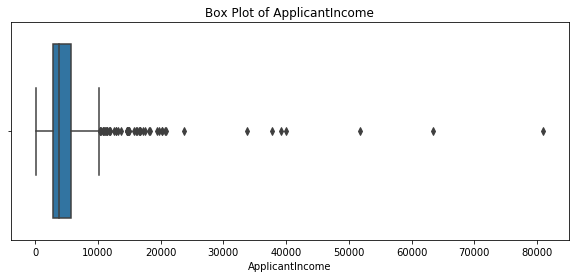

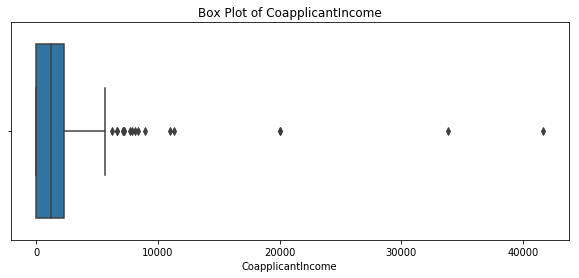

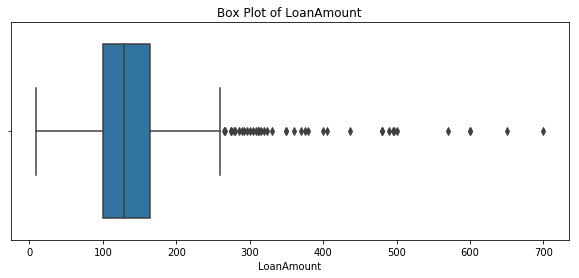

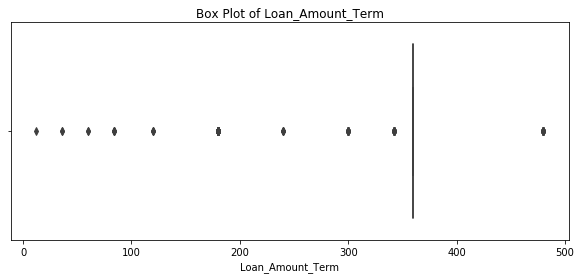

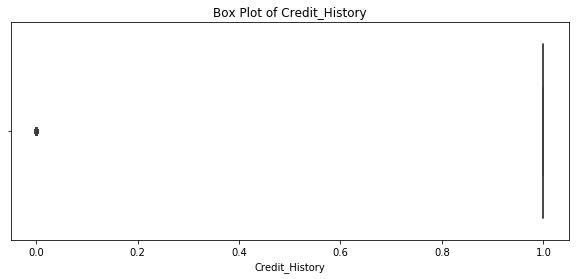

In [51]:
for num_variable in train_num:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( x=num_variable, data = train_num)
    plt.title(str('Box Plot of ') + str(num_variable))

In [52]:
def outlier_capping(x):
    ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(ul)
    x = x.clip_lower(ll)
    return x

customer_num=train_num.apply(lambda x: outlier_capping(x))
customer_num.describe()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  after removing the cwd from sys.path.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  """


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.0,614.0
mean,4617.111564,1419.702362,138.010586,360.0,1.0
std,2479.851729,1624.605974,55.771779,0.0,0.0
min,150.000000,0.000000,9.000000,360.0,1.0
25%,2877.500000,0.000000,100.250000,360.0,1.0
50%,3812.500000,1188.500000,129.000000,360.0,1.0
75%,5795.000000,2297.250000,164.750000,360.0,1.0
max,10171.250000,5743.125000,261.500000,360.0,1.0


* checking the outlier 

ApplicantIncome    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

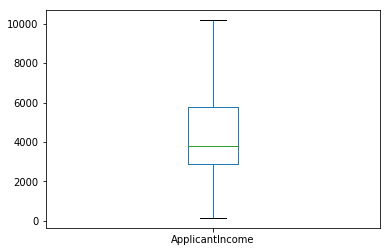

In [53]:
customer_num['ApplicantIncome'].plot(subplots=True , kind = 'box')

In [54]:
for col in customer_num.columns:
    print(col,": ",len(train_num[col].unique()),'labels')

ApplicantIncome :  505 labels
CoapplicantIncome :  287 labels
LoanAmount :  203 labels
Loan_Amount_Term :  11 labels
Credit_History :  2 labels


In [55]:
new_train = pd.concat([customer_num,train_new_cat],axis=1)
new_train.shape

(614, 16)

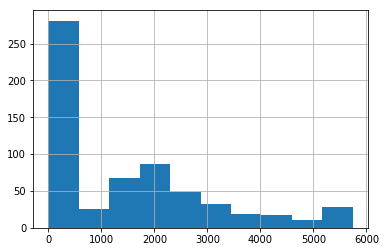

In [56]:
fig=customer_num.CoapplicantIncome.hist(bins=10)
fig

In [57]:
x_train = new_train.iloc[:,:-1]
y_train = new_train['Loan_Status_Y'].values

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [62]:
regressor = RandomForestClassifier(n_estimators = 100, random_state = 0)
regressor.fit(x, y)
y_pred=regressor.predict(x_test )
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9284883720930233

In [63]:
new_test.shape

(367, 15)

In [64]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(n_estimators=10)
ab.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=None)

In [72]:
new_test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [73]:
new_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [74]:
x_train = new_train.iloc[:,:-1]
y_train = new_train['Loan_Status_Y']

In [121]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(n_estimators=10)
ab.fit(x_train,y_train)
pred=ab.predict(new_test)

In [122]:
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,

In [125]:
validation_report = pd.read_csv("sample_submission_49d68Cx.csv")
validation_report['Loan_Status'].unique()

array(['N'], dtype=object)

In [126]:
validation_id=validation_report.drop('Loan_ID',axis=1)

In [127]:
validation=pd.get_dummies(validation_id)

In [128]:
validation.head()

,Loan_Status_N
0,1
1,1
2,1
3,1
4,1


In [123]:
score=ab.score(new_test,validation)
score

0.8991825613079019

In [112]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 0)
rfc.fit(x_train,y_train)
pred1=rfc.predict(new_test)
pred1

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [113]:
score1=rfc.score(new_test,validation)
score1

0.8719346049046321

In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix(new_test,pred1)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [130]:
data=pd.DataFrame(pred1)
data.columns=['Loan_Status']
Id=validation_report[['Loan_ID']]
final=pd.concat([Id,data],axis=1)
final.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0


In [134]:
final.to_csv("Sample_submission.csv",index=False)